# Polynomial regression
Polynomial regression will allow us to build a nonlinear model by adopting and fitting a polynomial.

We have seen how to solve a linear problem. But in everyday life, we meet a lot of other models that are not linear, which are made of curves, sinusoids etc...

If we observe the contamination rate of a pandemic, the line will not be linear but will probably look like an exponential curve.

For example, if you apply a linear model on these data :




![polynomial](./assets/polynom_1.JPG)


We can see that the bias of our predictions will be important.   
We cannot say that our model is effective.

But the following model already inspires me much more confidence.

![](./assets/poly_2.jpg)

The polynomial can have several degrees, the more degrees it has, the more it will be able to solve complex problems.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/16/Lsf.gif" />
Source <a href=https://upload.wikimedia.org/wikipedia/commons/1/16/Lsf.gif >Wikipedia</a>

Although polynomial models allow us to model relationships of non-linear shapes, they belong to the family of linear models. In the term "linear model", the adjective "linear" refers to the parameters of the model and the fact that their effects are added together. This is indeed the case here. Moreover, linear regression is a polynomial of degree 1. 

## Variables studied

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd

First of all, we will load our dataset. This is a fake dataset for the example.

In [2]:
df = pd.read_csv("/home/regis/Desktop/regression/ANT-Theano-2-27/4.machine_learning/1.Regression/data/poly.csv")
df.head()

,x,y
0,0.302472,-4.306789
1,-1.270485,-56.483346
2,1.532779,211.100819
3,-1.602058,-39.496543
4,1.139401,168.565071


In [3]:
df.shape

(200, 2)

As you can see we now have 200 rows, 1 feature and 1 target.

**Exercise :** Create the x and y variables and define which column will be the target and which column will be the feature. 
Variables x and y must be of type `numpy.ndarray`. Our variable x therefore has one dimension. (200, 1)

In [6]:
x, y=df[['x']].to_numpy(), df[['y']].to_numpy()

In [7]:
x.shape

(200, 1)

In [8]:
y.shape

(200, 1)

### Relationship between variables

**Exercise:** Use matplotlib (or other) to display a dataset in scatter plot.

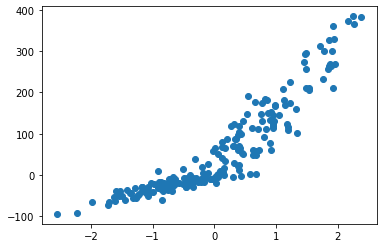

In [15]:
plt.scatter(x,y)

**Exercise :** Show correlation coefficients.

In [16]:
r = np.corrcoef(x[:,0], y[:,0])
r

array([[1.       , 0.9112288],
       [0.9112288, 1.       ]])

As we can see, the coefficient of correlation remains important even if the dataset is not perfectly linear.

### Split the dataset


You now know the process!

**Exercise :** Import train_test_split from sklearn and split the dataset and create the variables X_train, X_test, y_train, y_test.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

##  Load and fit the model (with Sklearn)

This time there is a little change. 
We have a single feature in our dataset. The polynomial model is a special case of multiple regression. So we need several features to be able to apply polynomial regression. And these features, we'll have to add them ourselves. By the way, this way of doing things has a name: feature engineering.


Let's imagine that we want to have a 2-degree polynomial regression. 
So we will need to add a feature. 
This feature is simply an exponent of x.  

$[ x, x²]$

So x² is the new feature.

If you want a 3-degree polynomial model, you will have to add 2 features in this case.

$[x, x², x³]$

To do this, we will need to create a pipeline. 
A pipeline is a processing chain that will execute a set of functions and pass arguments between them.


In [31]:
'''from sklearn.preprocessing import PolynomialFeatures
trans = PolynomialFeatures(degree=2,include_bias=False)
x_d3 = trans.fit_transform(x)
print(x_d3)'''

'from sklearn.preprocessing import PolynomialFeatures\ntrans = PolynomialFeatures(degree=2,include_bias=False)\nx_d3 = trans.fit_transform(x)\nprint(x_d3)'

First of all, we need to define the number of degrees.   
**Exercise:** Create a degree variable with 1 as value. (We will change this value later)

In [37]:
degree=1

**Exercise :** Create a pipeline with sklearn.This pipeline must contain the ``PolynomialFeatures`` and ``LinearRegression`` classes. Don't forget to set the number of degrees for the ``PolynomialFeatures``


In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

**Exercise :** Fit your model.

In [43]:
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

**Exercise :** Use a scatter plot and display your predictions on X_test

In [44]:
polyreg.score(X_train,y_train)

0.8404080601453898

In [45]:
polyreg.predict(X_test)

array([[   8.43940479],
       [ 118.30454181],
       [ 145.08115573],
       [  43.93203955],
       [ 150.04388057],
       [  85.86940566],
       [   2.98730277],
       [ 122.4754305 ],
       [  12.66183939],
       [-100.43314983],
       [  87.94534974],
       [  39.08250534],
       [  66.5882037 ],
       [  86.43959811],
       [  10.49241264],
       [ 130.99861467],
       [  90.23138476],
       [  67.32441254],
       [ 272.25828255],
       [ -55.78627599],
       [  92.25217366],
       [ -63.04856863],
       [  39.25604964],
       [  72.20466033],
       [ -78.23612476],
       [  67.11579505],
       [  75.31242087],
       [  59.58566264],
       [  69.94011886],
       [ 127.78020692],
       [-101.29221466],
       [ -75.91398084],
       [ -44.12205001],
       [  84.3754556 ],
       [ 173.08258926],
       [  59.98865546],
       [ -37.62868539],
       [ 169.11549791],
       [ -12.50938242],
       [  70.08131256]])

In [46]:
polyreg.score(X_test, y_test)

0.7210154017830409

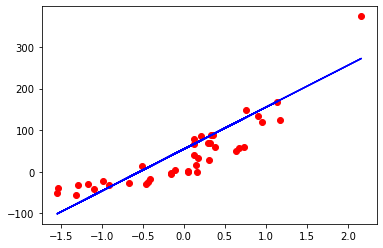

In [47]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, polyreg.predict(X_test), color='blue')

If you see a straight line it is because we have set the number of degrees to one. This confirms that the linear regression is indeed a polynomial model of degree 1.

**Exercise :** Change the number of degrees and train your model again. You must try to fit the curve as well as possible while limiting the number of degrees, to save some resources from your machine.

In [138]:
degree=2

In [139]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [140]:
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [141]:
polyreg.score(X_train,y_train)

0.9112980610785768

In [142]:
polyreg.score(X_test, y_test)

0.8938451431932254

In [143]:
np.amax(X_train)

2.383144774863942

In [144]:
np.amin(X_train)

-2.5529898158340787

In [145]:
X_seq = np.linspace(np.amin(X_train),np.amax(X_train),300).reshape(-1,1)

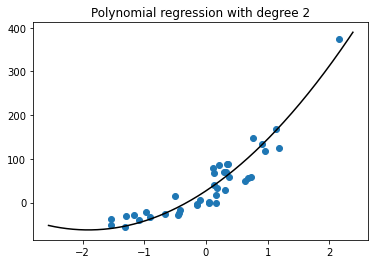

In [146]:
plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [122]:
#this does not work

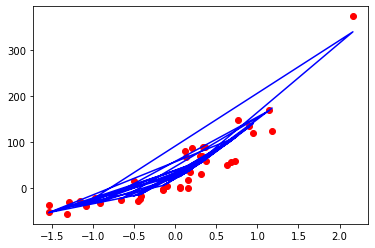

In [77]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, polyreg.predict(X_test), color='blue')

## From scratch.

Again a few changes. This time we'll just have to add new features manually. 

### Transform to matrix

$$
\\ Y = X . \theta \\
$$

The $Y$ vector is the same too

$$Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$ 


The theta vector will have as many lines as there are characteristics +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

The $X$ initially looks like this : 

$$ X =
\begin{bmatrix}
x^{(1)}\\
x^{(2)}\\
x^{(3)}\\
x^{(m)}\\
\end{bmatrix}
$$

If we want to add a degree to the polynomial, it adds a feature to our $X$. And this feature will contain x².

Example of polynomial of degree 2 :

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)2}_2\\
x^{(2)}_1, x^{(2)2}_2\\
x^{(3)}_1, x^{(3)2}_2\\
\dots, \dots\\
x^{(m)}_1,x^{(m)k}_2\\
\end{bmatrix}
$$

Example of polynomial of degree 3: (In this case the third feature will be of power 3.)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)2}_2, x^{(1)3}_3\\
x^{(2)}_1, x^{(2)2}_2, x^{(2)3}_3\\
x^{(3)}_1, x^{(3)2}_2, x^{(3)3}_3\\
\dots, \dots,\dots \\
x^{(m)}_1,x^{(m)2}_2, x^{(m)3}_3\\
\end{bmatrix}
$$

And so on and so forth. Of course, don't forget at the end to add a feature with only 1s.

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)2}_2, ..., x^{(m)k}_{n}, 1\\
x^{(2)}_1, x^{(2)2}_2, ..., x^{(m)k}_{n}, 1\\
x^{(3)}_1, x^{(3)2}_2, ..., x^{(m)k}_{n}, 1\\
x^{(m)}_1,x^{(m)k}_2, ..., x^{(m)k}_{n}, 1\\
\end{bmatrix}
$$

**Exercise :** Create a matrix for a 3 degrees polynomial $[x, x², x³, 1]$

In [149]:
x

array([[ 0.3024719 ],
       [-1.270485  ],
       [ 1.53277921],
       [-1.60205766],
       [ 1.13940068],
       [-0.50965218],
       [ 0.40746184],
       [ 0.76103773],
       [ 0.44386323],
       [ 0.37816252],
       [-1.45436567],
       [-1.07075262],
       [-0.41361898],
       [ 1.92294203],
       [-0.89546656],
       [-0.38732682],
       [-1.5447711 ],
       [-0.80340966],
       [-0.4555325 ],
       [-0.51080514],
       [ 0.1666735 ],
       [ 0.92220667],
       [ 1.17877957],
       [-0.67433266],
       [-0.57884966],
       [ 1.89588918],
       [ 0.4393917 ],
       [-0.63432209],
       [-1.63019835],
       [ 2.2408932 ],
       [-0.43782004],
       [-1.70627019],
       [ 1.48051479],
       [ 0.3563664 ],
       [-1.34775906],
       [ 0.14404357],
       [ 1.3263859 ],
       [ 2.16323595],
       [ 0.6536186 ],
       [-1.00021535],
       [-0.6436184 ],
       [-0.82643854],
       [-1.22543552],
       [-0.21274028],
       [ 0.72909056],
       [-0

In [148]:
from sklearn.preprocessing import PolynomialFeatures
trans = PolynomialFeatures(degree=3,include_bias=False)
x_d3 = trans.fit_transform(x)
x_d3

array([[ 3.02471898e-01,  9.14892489e-02,  2.76729267e-02],
       [-1.27048500e+00,  1.61413213e+00, -2.05073066e+00],
       [ 1.53277921e+00,  2.34941212e+00,  3.60113006e+00],
       [-1.60205766e+00,  2.56658873e+00, -4.11182313e+00],
       [ 1.13940068e+00,  1.29823392e+00,  1.47920862e+00],
       [-5.09652182e-01,  2.59745346e-01, -1.32379782e-01],
       [ 4.07461836e-01,  1.66025148e-01,  6.76489117e-02],
       [ 7.61037725e-01,  5.79178419e-01,  4.40776627e-01],
       [ 4.43863233e-01,  1.97014569e-01,  8.74475237e-02],
       [ 3.78162520e-01,  1.43006891e-01,  5.40798463e-02],
       [-1.45436567e+00,  2.11517952e+00, -3.07624448e+00],
       [-1.07075262e+00,  1.14651118e+00, -1.22762985e+00],
       [-4.13618981e-01,  1.71080661e-01, -7.07622087e-02],
       [ 1.92294203e+00,  3.69770604e+00,  7.11047434e+00],
       [-8.95466561e-01,  8.01860362e-01, -7.18039141e-01],
       [-3.87326817e-01,  1.50022063e-01, -5.81075684e-02],
       [-1.54477110e+00,  2.38631774e+00

In [152]:
X=np.hstack((x_d3, np.ones((x.shape[0],1))))

In [157]:
X

array([[ 3.02471898e-01,  9.14892489e-02,  2.76729267e-02,
         1.00000000e+00],
       [-1.27048500e+00,  1.61413213e+00, -2.05073066e+00,
         1.00000000e+00],
       [ 1.53277921e+00,  2.34941212e+00,  3.60113006e+00,
         1.00000000e+00],
       [-1.60205766e+00,  2.56658873e+00, -4.11182313e+00,
         1.00000000e+00],
       [ 1.13940068e+00,  1.29823392e+00,  1.47920862e+00,
         1.00000000e+00],
       [-5.09652182e-01,  2.59745346e-01, -1.32379782e-01,
         1.00000000e+00],
       [ 4.07461836e-01,  1.66025148e-01,  6.76489117e-02,
         1.00000000e+00],
       [ 7.61037725e-01,  5.79178419e-01,  4.40776627e-01,
         1.00000000e+00],
       [ 4.43863233e-01,  1.97014569e-01,  8.74475237e-02,
         1.00000000e+00],
       [ 3.78162520e-01,  1.43006891e-01,  5.40798463e-02,
         1.00000000e+00],
       [-1.45436567e+00,  2.11517952e+00, -3.07624448e+00,
         1.00000000e+00],
       [-1.07075262e+00,  1.14651118e+00, -1.22762985e+00,
      

In [154]:
X.shape

(200, 4)

**Exercise :** Initialize the random theta vector, with 4 elements (because X has four columns)

In [158]:
theta=np.random.randn(4,1)

**Exercise :** Create the model. It is always the same $$Y = X . \theta $$

In [159]:
def model(X, theta):
    return X.dot(theta)

**Exercise :** Create a MSE function. It is always the same too.

In [160]:
def MSE(X,y,theta):
    m=len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [161]:
MSE(X,y,theta)

8373.542944058765

**Exercise :** Creat a ``grad`` function. Again, It is always the same.

In [162]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

**Exercise :** 
Again...
1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate`, `n_iterations`
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to `n_iterations`
4. In the loop, update `theta` with the formula of the gradient descent (The example above)
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`
6. Return `theta` and `cost_history`

In [163]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i]=MSE(X,y,theta)
    return theta, cost_history

### Train your model 

**Exercise :** Create variables `n_iterations` and `learning_rate`.

In [172]:
n_iterations=1000
learning_rate=0.01

**Exercise :** Create variables `theta_final`, `cost_history` and instance `gradient_descent()`.

In [173]:
theta_final, cost_history=gradient_descent(X,y,theta,learning_rate,n_iterations)

**Exercise :** Create a `predictions` variable that contains `model(X, theta_final)`.


In [178]:
predictions=model(X,theta_final)
predictions.shape

(200, 1)

In [175]:
X_seq = np.linspace(np.amin(X),np.amax(X),300).reshape(-1,1)

**Exercise :** Project your predictions and the true values of the dataset

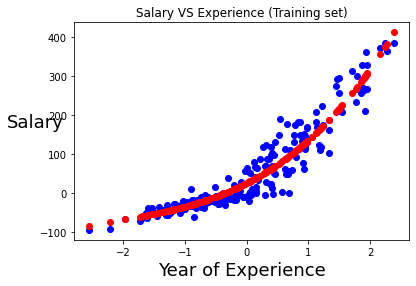

In [179]:
import matplotlib.pyplot as plt
plt.xlabel("Year of Experience", fontsize=18)
plt.ylabel("Salary", rotation=0, fontsize=18)
plt.title("Salary VS Experience (Training set)")
plt.scatter(x, y, color='blue')
plt.scatter(x, predictions, color='red')

It says it looks like this.

<img src="./assets/poly3.JPG" />

**Exercise :** Plot cost_history

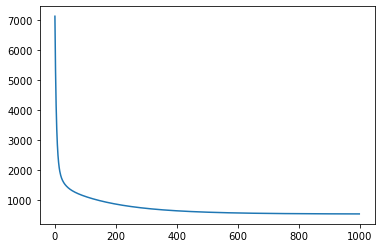

In [180]:
plt.plot(range(n_iterations), cost_history)

In [181]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [182]:
coef_determination(y, predictions)

0.9109532257458979

**Exercise :** Try to improve your model by adding a degree to your polynomial model.

In [192]:
from sklearn.preprocessing import PolynomialFeatures
trans = PolynomialFeatures(degree=4,include_bias=False)
x_d4 = trans.fit_transform(x)
x_d4

array([[ 3.02471898e-01,  9.14892489e-02,  2.76729267e-02,
         8.37028267e-03],
       [-1.27048500e+00,  1.61413213e+00, -2.05073066e+00,
         2.60542254e+00],
       [ 1.53277921e+00,  2.34941212e+00,  3.60113006e+00,
         5.51973731e+00],
       [-1.60205766e+00,  2.56658873e+00, -4.11182313e+00,
         6.58737772e+00],
       [ 1.13940068e+00,  1.29823392e+00,  1.47920862e+00,
         1.68541131e+00],
       [-5.09652182e-01,  2.59745346e-01, -1.32379782e-01,
         6.74676450e-02],
       [ 4.07461836e-01,  1.66025148e-01,  6.76489117e-02,
         2.75643498e-02],
       [ 7.61037725e-01,  5.79178419e-01,  4.40776627e-01,
         3.35447641e-01],
       [ 4.43863233e-01,  1.97014569e-01,  8.74475237e-02,
         3.88147405e-02],
       [ 3.78162520e-01,  1.43006891e-01,  5.40798463e-02,
         2.04509709e-02],
       [-1.45436567e+00,  2.11517952e+00, -3.07624448e+00,
         4.47398438e+00],
       [-1.07075262e+00,  1.14651118e+00, -1.22762985e+00,
      

In [193]:
X=np.hstack((x_d4, np.ones((x.shape[0],1))))

In [194]:
theta=np.random.randn(5,1)

In [195]:
theta_final, cost_history=gradient_descent(X,y,theta,learning_rate,n_iterations)

In [196]:
predictions=model(X,theta_final)
predictions.shape

(200, 1)

In [197]:
X_seq = np.linspace(np.amin(X),np.amax(X),300).reshape(-1,1)

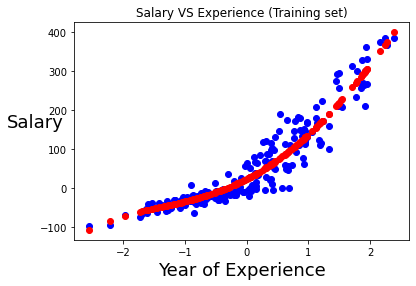

In [198]:
import matplotlib.pyplot as plt
plt.xlabel("Year of Experience", fontsize=18)
plt.ylabel("Salary", rotation=0, fontsize=18)
plt.title("Salary VS Experience (Training set)")
plt.scatter(x, y, color='blue')
plt.scatter(x, predictions, color='red')

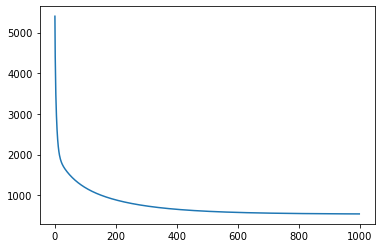

In [199]:
plt.plot(range(n_iterations), cost_history)

In [200]:
coef_determination(y, predictions)

0.9120791513164981

Good, you must feel like this now: 

![](https://media.giphy.com/media/DHqth0hVQoIzS/giphy.gif)

## Where to go next ? 
Linear models might look simple but they can get very complicated.
You might look into **Ridge Regression** or **Lasso Regression** if you want to further deepen your knowledge.

- [Statquest - Regularization explained (Lasso & Ridge)](https://youtu.be/Q81RR3yKn30)